# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Phan Võ Minh Tuệ
- MSSV: 22127440
- Lớp: Toán ứng dụng và thống kê cho Công nghệ thông tin - 22CLC10

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Cài đặt hàm

In [3]:
# Spearman correlation
def spearman_correlation(x, y):
    '''
    Hàm tính hệ số tương quan Spearman

    Parameters:
    ----------
    x (numpy.ndarray): Mảng dữ liệu thứ nhất
    y (numpy.ndarray): Mảng dữ liệu thứ hai

    Returns:
    ----------
    float: Hệ số tương quan Spearman

    '''

    n = len(x)

    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))
    d = rank_x - rank_y

    spearman_corr = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))

    return spearman_corr

# OLS Linear Regression
class OLSLinearRegression:
    def fit(self, X, y):
        '''
        This function is used to fit the model to the data using the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data (n_samples, n_features)
        y : np.array
            Output data (n_samples,)

        Returns
        -------
        self : object
            Returns the instance of the class
        '''

        # Add a column of ones to X to account for the intercept term
        X = np.column_stack([np.ones(X.shape[0]), X])

        # Calculate the optimal parameters using the normal equation
        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y

        return self

    def get_params(self):
        '''
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (intercept and coefficients)
        '''

        return self.w

    def predict(self, X):
        '''
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data (n_samples, n_features)

        Returns
        -------
        y_pred : np.array
            Predicted output (n_samples,)
        '''

        # Add a column of ones to X to account for the intercept term
        X = np.column_stack([np.ones(X.shape[0]), X])

        # Predict the output
        y_pred = X @ self.w

        return y_pred

# Hàm tính MAE
def mean_absolute_error(y, y_hat):
    '''
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Mean absolute error
    '''

    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

# Hàm để thực hiện k-fold cross validation
def create_folds(n_samples, k=5, random_state=42):
    '''
    This function is used to create folds for k-fold cross validation

    Parameters
    ----------
    n_samples : int
        Number of samples
    k : int
        Number of folds (default: 5)

    Returns
    -------
    folds : list
        List of folds
    '''
    np.random.seed(random_state)
    indices = np.random.permutation(n_samples)
    fold_sizes = np.full(k, n_samples // k, dtype=int)
    fold_sizes[:n_samples % k] += 1
    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        folds.append(indices[start:stop])
        current = stop
    return folds

def k_fold_cross_validation(X, y, folds):
    '''
    This function is used to perform k-fold cross validation

    Parameters
    ----------
    X : np.array
        Input data
    y : np.array
        Output data

    Returns
    -------
    float: Mean absolute error
    '''
    mae_scores = []

    for val_indices in folds:
        train_indices = np.concatenate([fold for fold in folds if not np.array_equal(fold, val_indices)])

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        model = OLSLinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mae_scores.append(mae)

    return np.mean(mae_scores)

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

In [4]:
# Hiển thị thông tin về DataFrame
print("Thông tin về DataFrame:")
print(X_train.info())

# Thống kê mô tả
print("\n\nThống kê mô tả:")
print(X_train.describe())

# Hệ số tương quan Spearman
print("\n\nHệ số tương quan Spearman:")
for col in X_train.columns:
    correlation = spearman_correlation(X_train[col].values, y_train.values)
    print(f"+ Giữa {col} và Performance Index: {correlation:.4f}")

Thông tin về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9000 non-null   int64
 1   Previous Scores                   9000 non-null   int64
 2   Extracurricular Activities        9000 non-null   int64
 3   Sleep Hours                       9000 non-null   int64
 4   Sample Question Papers Practiced  9000 non-null   int64
dtypes: int64(5)
memory usage: 351.7 KB
None


Thống kê mô tả:
       Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.0000

**THÔNG TIN VỀ DATAFRAME**

- **Số lượng mẫu**: DataFramez có 9,000 mẫu dữ liệu.
- **Số lượng cột**: 5 cột bao gồm `Hours Studied`, `Previous Scores`, `Extracurricular Activities`, `Sleep Hours`, và `Sample Question Papers Practiced`.
- **Kiểu dữ liệu**: Tất cả các cột đều có kiểu dữ liệu là `int64`.

\\
**THỐNG KÊ MÔ TẢ**

- **Hours Studied**:
  - Thời gian học trung bình là 4.98 giờ với độ lệch chuẩn là 2.59.
  - Thời gian học tối thiểu là 1 giờ và tối đa là 9 giờ.
  - 50% sinh viên học từ 3 đến 7 giờ.

- **Previous Scores**:
  - Điểm trung bình trước đó là 69.40 với độ lệch chuẩn là 17.37.
  - Điểm thấp nhất là 40 và cao nhất là 99.
  - 50% sinh viên có điểm từ 54 đến 85.

- **Extracurricular Activities**:
  - Trung bình số hoạt động ngoại khóa là 0.49 với độ lệch chuẩn là 0.50.
  - Cho thấy xấp xỉ 49% số sinh viên tham gia khảo sát có tham gia hoạt động ngoại khóa.

- **Sleep Hours**:
  - Trung bình số giờ ngủ là 6.54 giờ với độ lệch chuẩn là 1.70.
  - Số giờ ngủ dao động từ 4 đến 9 giờ.
  - 50% sinh viên ngủ từ 5 đến 8 giờ.

- **Sample Question Papers Practiced**:
  - Trung bình số lượng đề mẫu đã luyện tập là 4.59 với độ lệch chuẩn là 2.86.
  - Số lượng đề luyện tập dao động từ 0 đến 9 đề.
  - 50% sinh viên đã luyện tập từ 2 đến 7 đề.

\\
**NHẬN XÉT VỀ HỆ SỐ TƯƠNG QUAN SPEARMAN**
1. **Hours Studied và Performance Index**: Có mối tương quan dương nhẹ (0.3456). Điều này cho thấy thời gian học có ảnh hưởng đến chỉ số hiệu suất, nhưng không phải là yếu tố quyết định chính.

2. **Previous Scores và Performance Index**: Mối tương quan dương rất mạnh (0.9201). Điều này chỉ ra rằng điểm số trước đó là yếu tố dự báo rất tốt cho chỉ số hiệu suất, thể hiện sự ảnh hưởng lớn của điểm số lịch sử đối với kết quả hiện tại.

3. **Extracurricular Activities và Performance Index**: Mối tương quan dương rất yếu (0.0182). Điều này cho thấy hoạt động ngoại khóa không có ảnh hưởng đáng kể đến chỉ số hiệu suất, hoặc ảnh hưởng rất nhỏ.

4. **Sleep Hours và Performance Index**: Mối tương quan dương rất yếu (0.0418). Điều này cho thấy số giờ ngủ có ảnh hưởng rất nhỏ hoặc không đáng kể đến chỉ số hiệu suất.

5. **Sample Question Papers Practiced và Performance Index**: Mối tương quan dương rất yếu (0.0377). Điều này cho thấy việc luyện tập đề mẫu có tác động không đáng kể đến chỉ số hiệu suất.

\\
**TỔNG KẾT**

- **Previous Scores** là yếu tố quan trọng nhất ảnh hưởng đến **Performance Index**.
- **Hours Studied** có ảnh hưởng tương đối nhưng không phải là yếu tố quan trọng nhất quyết định **Performance Index**.
- Các yếu tố khác như , **Sleep Hours**, **Extracurricular Activities**, và **Sample Question Papers Practiced** có mối tương quan rất yếu với **Performance Index**, cho thấy chúng không đóng vai trò quan trọng trong việc dự đoán kết quả học tập.

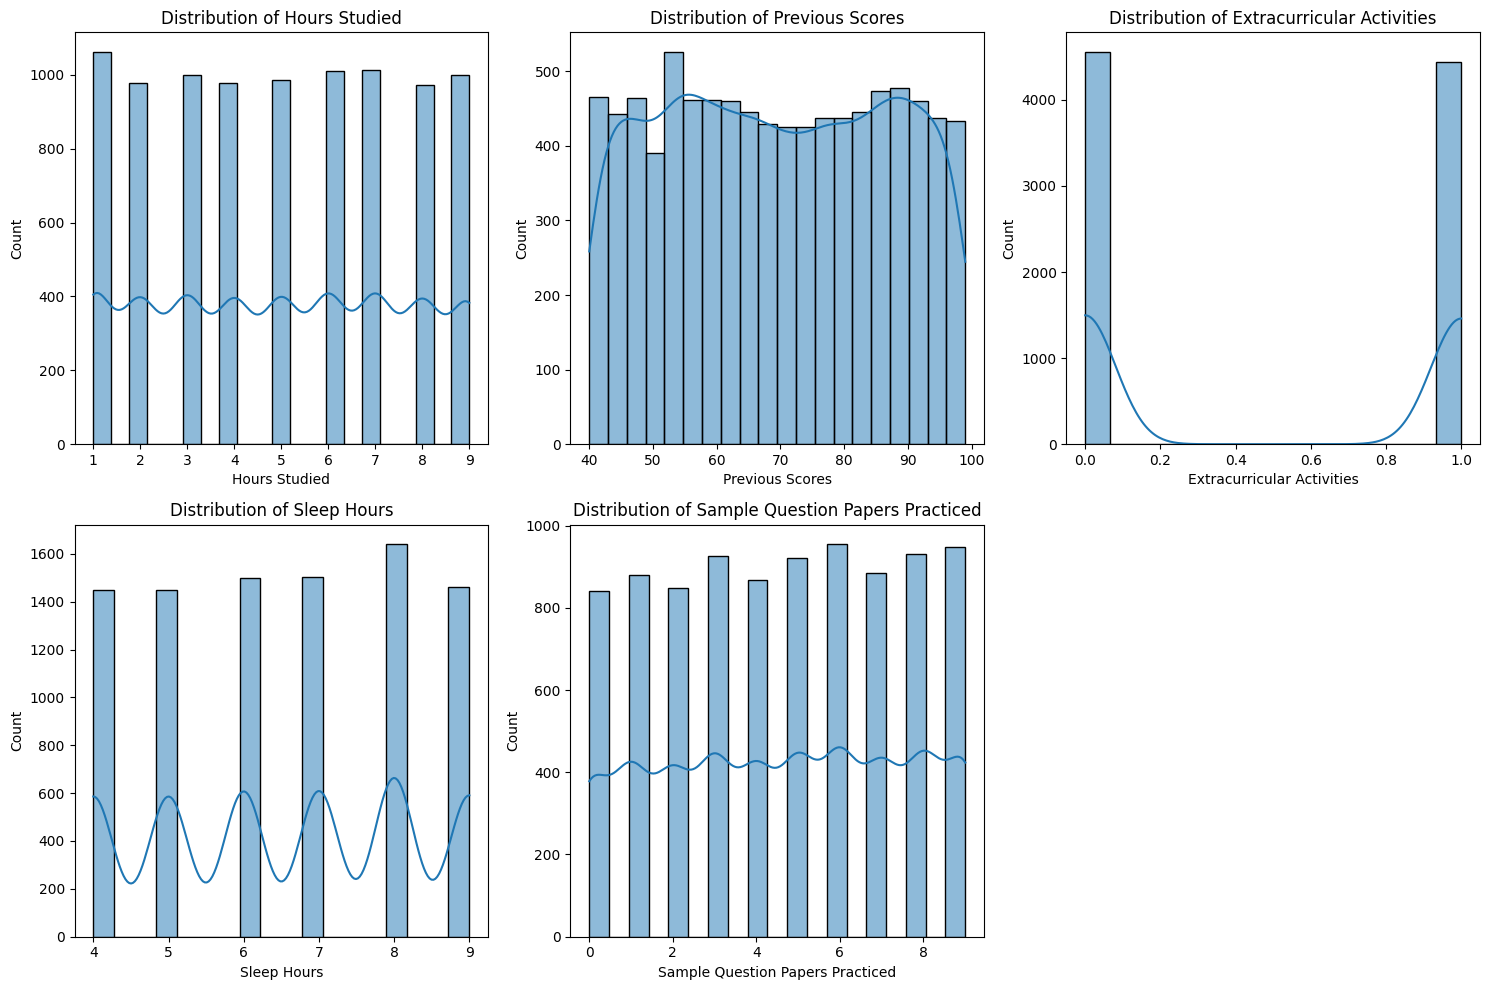

In [5]:
# Biểu đồ phân phối cho từng đặc trưng
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

if len(X_train.columns) < len(axes):
    for j in range(len(X_train.columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**NHẬN XÉT VỀ BIỂU ĐỒ PHÂN PHỐI**
1. **Hours Studied**, **Sleep Hours** và **Sample Question Papers Practiced** phân phối đều, không có sự tập trung mạnh ở bất kỳ dữ liệu nào.
2. **Previous Scores** phân bố khá đồng đều với một số đỉnh nhẹ ở các khoảng điểm khác nhau.
3. **Extracurricular Activities** phân phối đều giữa 2 giá trị CÓ và KHÔNG tham gia hoạt động ngoại khóa.

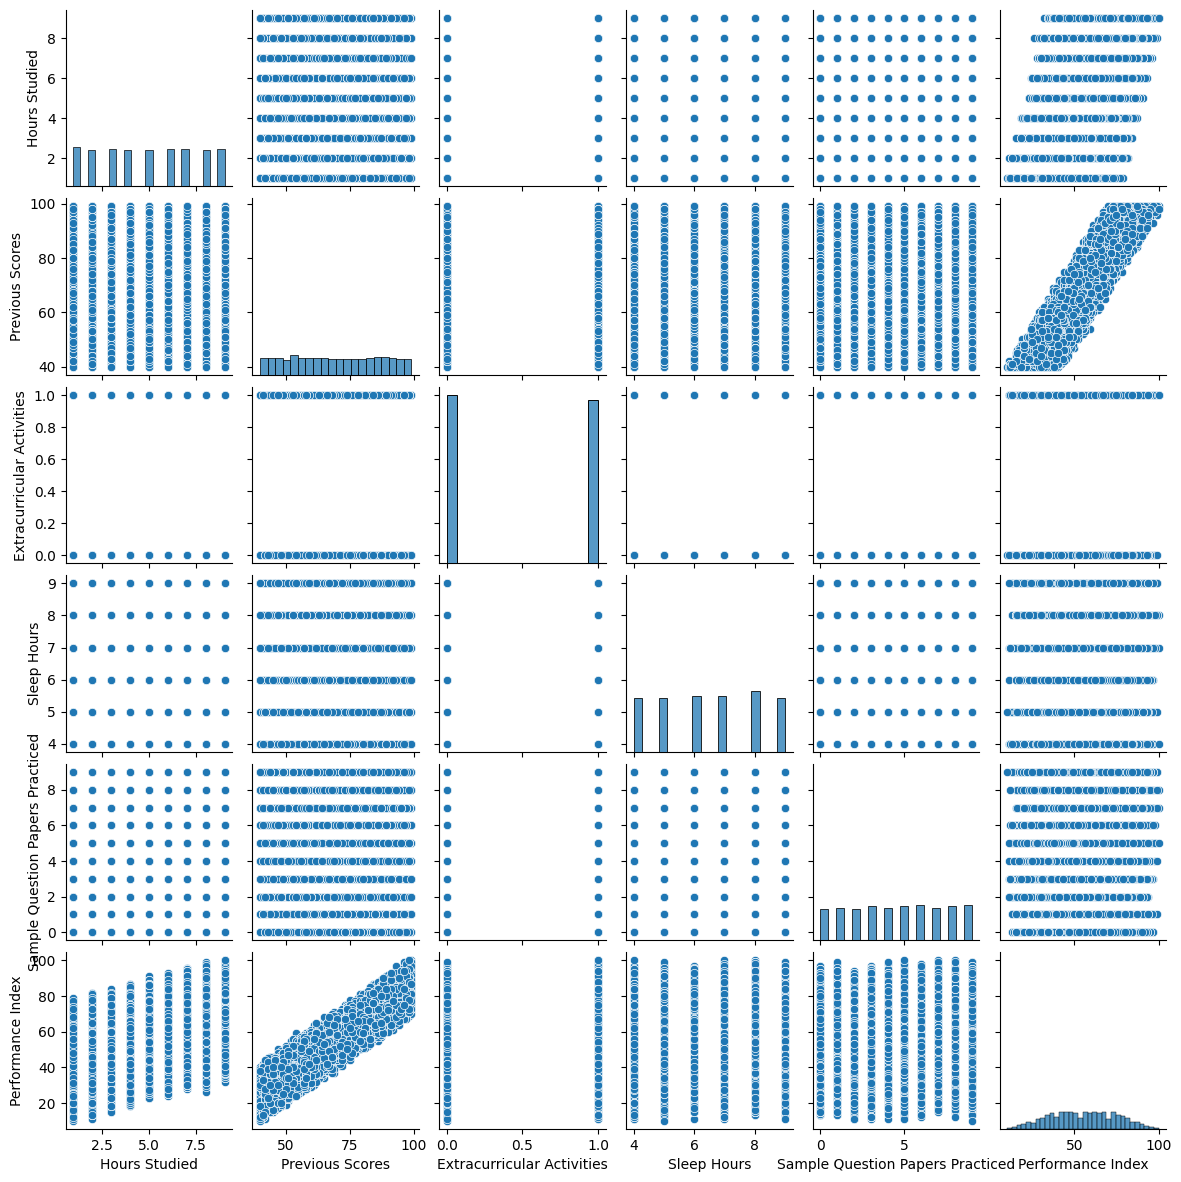

In [6]:
# Biểu đồ cặp (Pair Plot)
sns.pairplot(train, height=2)
plt.show()

**NHẬN XÉT VỀ BIỂU ĐỒ CẶP**
1. **Previous Scores** và **Performance Index** có mối quan hệ tuyến tính mạnh, thể hiện qua sự sắp xếp chặt chẽ của các điểm.
2. **Hours Studied** và **Performance Index** có xu hướng tăng lên cùng với nhau, nhưng không mạnh bằng Previous Scores.
3. Các cặp đặc trưng khác không có mối quan hệ tương quan rõ rệt với nhau, hầu hết các điểm phân bố rải rác.

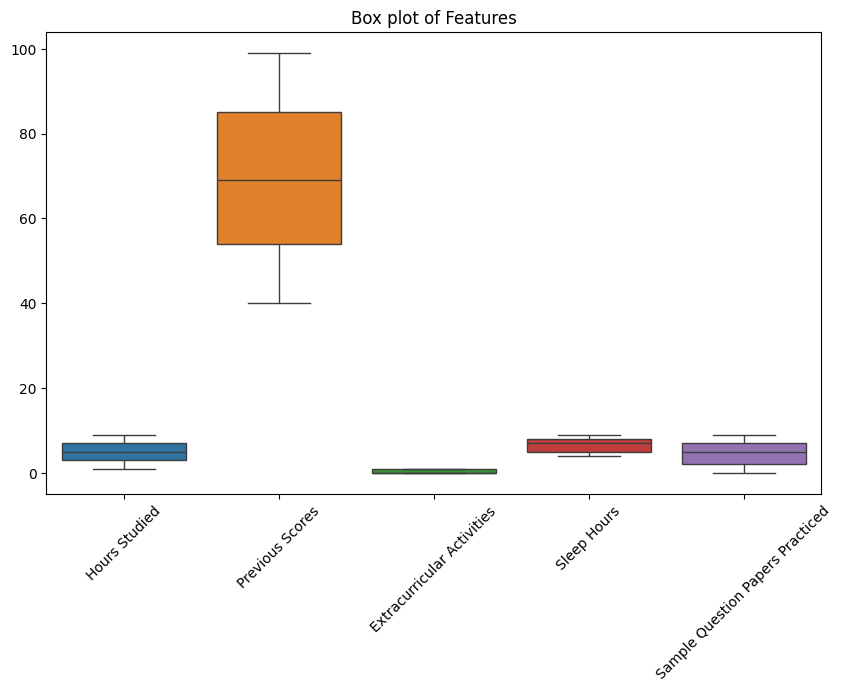

In [7]:
# Biểu đồ hộp (boxplot) cho từng đặc trưng
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.title('Box plot of Features')
plt.xticks(rotation=45)
plt.show()

**NHẬN XÉT VỀ BIỂU ĐỒ HỘP**
1. **Hours Studied**
    - Phân bố hẹp với giá trị nằm trong khoảng 1 đến 9 giờ.
    - Phần lớn các giá trị tập trung ở giữa khoảng, với một số ít giá trị ngoại lai.
2. **Previous Scores**
    - Phân bố giá trị rộng nhất trong các đặc trưng, với khoảng từ 40 đến gần 100.
    - Không có giá trị ngoại lai (outliers), phân bố khá đều.
3. **Extracurricular Activities**
    - Không có ý nghĩa, vì chỉ tồn tại 2 giá trị True (1) và False(0).
4. **Sleep Hours**
    - Phân bố hẹp với khoảng từ 4 đến 9 giờ.
    - Phần lớn giá trị tập trung xung quanh mức trung bình, không có giá trị ngoại lai.
5. **Sample Question Papers Practiced**
    - Phân bố hẹp với giá trị từ 0 đến 8.
    - Boxplot cho thấy sự phân bố đồng đều với không có giá trị ngoại lai.

**Note:** *Giá trị ngoại lai (outlier) là các điểm dữ liệu cách xa các điểm dữ liệu khác. Nói một cách đơn giản, chúng là những giá trị bất thường trong một tập dữ liệu.*

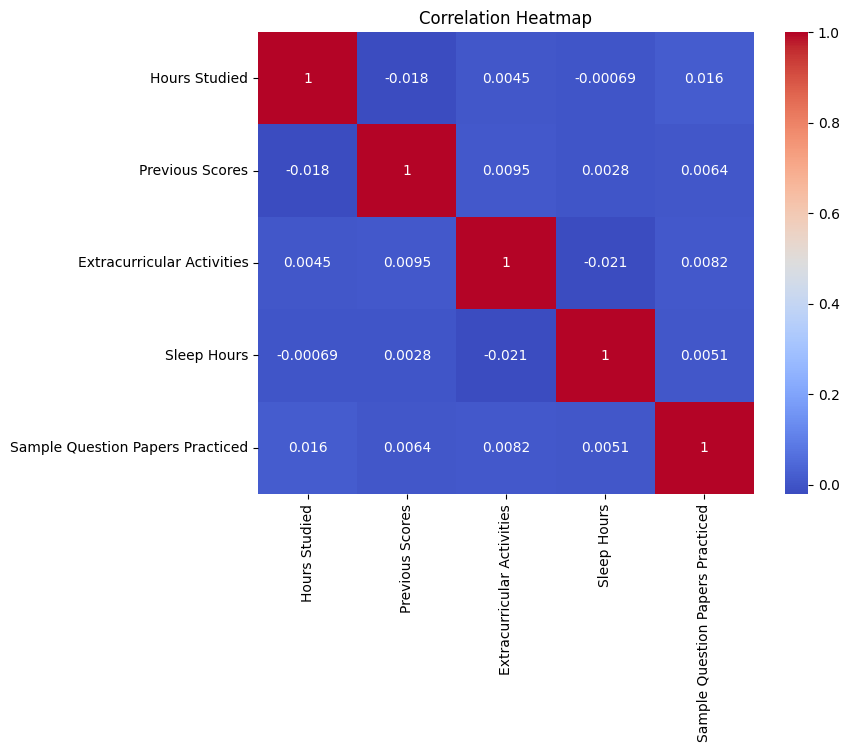

In [8]:
# Biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**NHẬN XÉT VỀ BIỂU ĐỒ HEATMAP CHO MA TRẬN TƯƠNG QUAN**
- Tất cả các mối tương quan giữa các biến đều rất yếu, với giá trị tương quan đều nằm dưới 0.02, cho thấy rằng các biến này không có mối quan hệ tuyến tính mạnh mẽ với nhau trong bộ dữ liệu này.
- Điều này có thể gợi ý rằng các yếu tố như số giờ học, hoạt động ngoại khóa, và số giờ ngủ có thể ảnh hưởng rất ít đến nhau hoặc không có mối liên hệ nào đáng kể.


# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm)

In [9]:
# Huấn luyện mô hình hồi quy tuyến tính cho 5 đặc trưng
model = OLSLinearRegression()
model.fit(X_train.values, y_train.values)

# Lấy các hệ số và hệ số chặn
coefficients = model.get_params()[1:]
intercept = model.get_params()[0]

# In công thức hồi quy tuyến tính cho 5 đặc trưng
print(f'Công thức hồi quy:\nStudent Performance = {intercept:.3f} + {" + ".join([f"{coef:.3f}*{feat}" for coef, feat in zip(coefficients, X_train.columns)])}')

Công thức hồi quy:
Student Performance = -33.969 + 2.852*Hours Studied + 1.018*Previous Scores + 0.604*Extracurricular Activities + 0.474*Sleep Hours + 0.192*Sample Question Papers Practiced


In [10]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test.values)

# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mae_value = mean_absolute_error(y_test.values, y_pred)
print(f'MAE cho mô hình 5 đặc trưng: {mae_value}')

MAE cho mô hình 5 đặc trưng: 1.595648688476289


# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [11]:
# Tạo folds
folds = create_folds(n_samples=len(X_train), k=5, random_state=42)

# Thực hiện cross-validation cho từng đặc trưng
features = X_train.columns
results = []

for feature in features:
    X_feature = X_train[feature].values.reshape(-1, 1)
    mae_value = k_fold_cross_validation(X_feature, y_train.values, folds)
    results.append((feature, mae_value))

# In kết quả
for feature, mae_value in results:
    print(f'MAE cho đặc trưng {feature}: {mae_value}')

# Đặc trưng tốt nhất
best_feature = min(results, key=lambda x: x[1])
print(f'\nĐặc trưng tốt nhất: {best_feature[0]} với MAE: {best_feature[1]}')

MAE cho đặc trưng Hours Studied: 15.448599359591949
MAE cho đặc trưng Previous Scores: 6.61821482613572
MAE cho đặc trưng Extracurricular Activities: 16.195872827607758
MAE cho đặc trưng Sleep Hours: 16.187006815684338
MAE cho đặc trưng Sample Question Papers Practiced: 16.188386006931275

Đặc trưng tốt nhất: Previous Scores với MAE: 6.61821482613572


**NHẬN XÉT:**  Đặc trưng tốt nhất phù hợp với phân tích khai phá dữ liệu ở phần 1.

In [12]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_feature_model = OLSLinearRegression()
best_feature_model.fit(X_train[best_feature[0]].values.reshape(-1, 1), y_train.values)

# Lấy các hệ số và hệ số chặn
coefficients = best_feature_model.get_params()[1:]
intercept = best_feature_model.get_params()[0]

# In công thức hồi quy tuyến tính cho đặc trưng tốt nhất
print(f'Công thức hồi quy cho đặc trưng tốt nhất:\nStudent Performance = {intercept:.3f} + {coefficients[0]:.3f}*{best_feature[0]}')

Công thức hồi quy cho đặc trưng tốt nhất:
Student Performance = -14.989 + 1.011*Previous Scores


In [13]:
# Dự đoán trên tập kiểm tra
y_pred_best = best_feature_model.predict(X_test[best_feature[0]].values.reshape(-1, 1))

# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
mae_best_feature = mean_absolute_error(y_test.values, y_pred_best)
print(f'MAE cho mô hình tốt nhất: {mae_best_feature}')

MAE cho mô hình tốt nhất: 6.5442772934525015


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình


### Mô hình 1: Performance Index = w0 + w1 * Previous Scores + w2 * Hours Studied
**Lý do xây dựng mô hình:**
- Đây là mô hình cơ bản kết hợp hai đặc trưng có tương quan mạnh nhất với `Performance Index`.
    + `Previous Scores` có tương quan mạnh nhất với `Performance Index` (hệ số Spearman 0.9202).
    + `Hours Studied` có tương quan mạnh thứ hai (hệ số Spearman 0.3479).

In [14]:
# Mô hình 1: Performance Index = w0 + w1 * Previous Scores + w2 * Hours Studied
def create_model_1(X):
    return X[['Hours Studied', 'Previous Scores']]

### Mô hình 2: Performance Index = w0 + w1 * Previous Scores + w2 * Hours Studied + w3 * (Previous Scores x Hours Studied)
**Lý do xây dựng mô hình:**
- Mô hình này mở rộng từ mô hình 1 bằng cách thêm một đặc trưng tương tác.
- Đặc trưng mới `Hours Studied * Previous Scores` có thể nắm bắt được tác động kết hợp của thời gian học và điểm số trước đó lên `Performance Index`.
- Ngoài ra, việc thêm này còn nhằm phát hiện các mối quan hệ phi tuyến tiềm ẩn giữa các đặc trưng và `Performance Index`.

In [15]:
# Mô hình 2: Performance Index = w0 + w1 * Previous Scores + w2 * Hours Studied + w3 * (Previous Scores x Hours Studied)
def create_model_2(X):
    X_new = X.copy()
    X_new['Hours Studied * Previous Scores'] = X_new['Hours Studied'] * X_new['Previous Scores']
    return X_new[['Hours Studied', 'Previous Scores', 'Hours Studied * Previous Scores']]

### Mô hình 3: Mô hình chuẩn hóa
**Lý do xây dựng mô hình:**
- Công bằng hơn trong huấn luyện mô hình: Các đặc trưng có các đơn vị đo lường khác nhau hoặc có các giá trị nằm trong các khoảng rất khác biệt. Ví dụ `Previous Scores` có giá trị từ 40 đến 99 điểm trong khi `Sleep Hours` chỉ có giá trị từ 1 đến 9 giờ. Điều này có thể dẫn đến sự chênh lệch trong việc huấn luyện mô hình, khi mà mô hình có thể đặt quá nhiều trọng số vào các đặc trưng có giá trị lớn hơn.
- Cải thiện hiệu suất mô hình: Chuẩn hóa giúp mô hình tránh tình trạng trọng số của các đặc trưng bị lệch do quy mô dữ liệu, và do đó giúp mô hình hội tụ nhanh hơn trong quá trình huấn luyện.

In [16]:
# Mô hình 3: Mô hình tổng hợp với trọng số cho từng đặc trưng
def create_model_3(X):
    X_mean = X.mean()
    X_std = X.std()
    X_scaled_df = (X - X_mean) / X_std

    return X_scaled_df

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [17]:
models = [create_model_1, create_model_2, create_model_3]

# Tạo folds
folds = create_folds(n_samples=len(X_train), k=5, random_state=42)

# Thực hiện cross-validation
results = []

for model in models:
    X_model = model(X_train)
    mae_value = k_fold_cross_validation(X_model.values, y_train.values, folds)
    results.append((model.__name__, mae_value))

# In kết quả
for model_name, mae_value in results:
    print(f'MAE cho mô hình {model_name}: {mae_value}')

# Mô hình tốt nhất
best_model = min(results, key=lambda x: x[1])
print(f'\nMô hình tốt nhất: {best_model[0]} với MAE: {best_model[1]}')

MAE cho mô hình create_model_1: 1.8161776492851331
MAE cho mô hình create_model_2: 1.8163623251231047
MAE cho mô hình create_model_3: 1.6215414357086444

Mô hình tốt nhất: create_model_3 với MAE: 1.6215414357086444


In [18]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
my_best_model = OLSLinearRegression()
my_best_model.fit(create_model_3(X_train).values, y_train.values)

# Lấy các hệ số và hệ số chặn
coefficients = my_best_model.get_params()[1:]
intercept = my_best_model.get_params()[0]

# In công thức hồi quy tuyến tính
print(f'Công thức hồi quy:\nStudent Performance = {intercept:.3f} + {" + ".join([f"{coef:.3f}*{feat}" for coef, feat in zip(coefficients, create_model_3(X_train).columns)])}')

Công thức hồi quy:
Student Performance = 55.136 + 7.400*Hours Studied + 17.680*Previous Scores + 0.302*Extracurricular Activities + 0.803*Sleep Hours + 0.551*Sample Question Papers Practiced


In [19]:
# Dự đoán trên tập kiểm tra
y_pred_my_best = my_best_model.predict(create_model_3(X_test).values)

# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
mae_my_best = mean_absolute_error(y_test.values, y_pred_my_best)
print(f'MAE cho mô hình my_best_model: {mae_my_best}')

MAE cho mô hình my_best_model: 1.7694548470278


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$